In [1]:
### importing things we need
import numpy as np
import dask
import dask.array as da
from glob import glob
from h5py import File
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import os
import shutil
from glob import glob
import sys
import numpy as np 
%matplotlib inline
sys.path.append('C:\\Users\\chena\\Documents\\GitHub\\local\\notebooks\\_alex_yu_data_analysis\\modules\\')
sys.path.append('C:\\Users\\chena\\Documents\\GitHub\\local\\notebooks\\_alex_yu_data_analysis\\')
import modules
import fish
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

import importEphys as ime
import scipy.io
from scipy.signal import find_peaks
from pandas import read_csv

In [4]:
caf_cap_dir = r'Z:\Alex\adenosine_paper\trpv1\proc\caf_cap'
caf_veh_dir = r'Z:\Alex\adenosine_paper\trpv1\proc\caf_veh'
ctrl_cap_dir = r'Z:\Alex\adenosine_paper\trpv1\proc\ctrl_cap'
ctrl_veh_dir = r'Z:\Alex\adenosine_paper\trpv1\proc\ctrl_veh'
#ne_path = r'C:\Users\chena\Documents\alpha1block.csv'

In [7]:
caf_cap_list = glob(caf_cap_dir+'\\*')
caf_veh_list = glob(caf_veh_dir+'\\*')
ctrl_cap_list = glob(ctrl_cap_dir+'\\*')
ctrl_veh_list = glob(ctrl_veh_dir+'\\*')

In [9]:
caf_cap_ca = []
caf_veh_ca = []
ctrl_cap_ca = []
ctrl_veh_ca = []
for i in range(len(caf_veh_list)):
    a = np.load(caf_veh_list[i])
    caf_veh_ca.append(a)
    
for i in range(len(caf_cap_list)):
    a = np.load(caf_cap_list[i])
    caf_cap_ca.append(a)
    
for i in range(len(ctrl_cap_list)):
    a = np.load(ctrl_cap_list[i])
    ctrl_cap_ca.append(a)
    
for i in range(len(ctrl_veh_list)):
    a = np.load(ctrl_veh_list[i])
    ctrl_veh_ca.append(a)

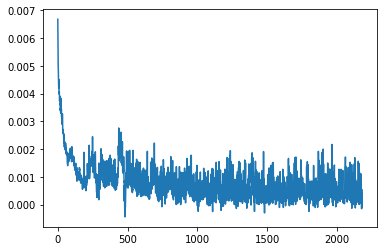

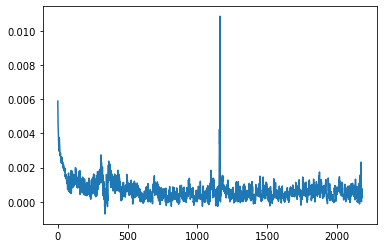

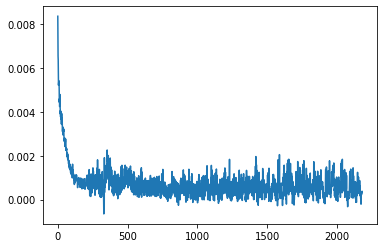

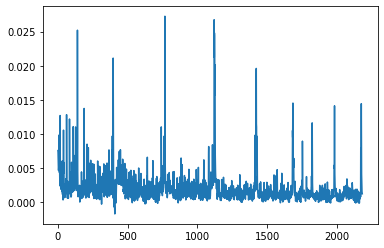

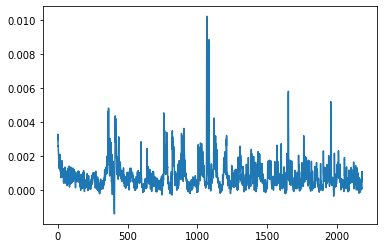

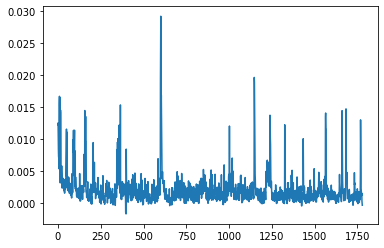

In [133]:
threshs = [0.002,0.004,0.002,0.0056,0.003,0.007]
struggleRates_caf_cap = np.zeros([len(caf_cap_ca),])
for i in range(len(caf_cap_ca)):
    plt.figure()
    plt.plot(caf_cap_ca[i])
    timeframe = caf_cap_ca[i][200:]
    peaks,times = find_peaks(timeframe,height = threshs[i])
    struggleRates_caf_cap[i] = len(peaks)/len(timeframe)*1.21

In [134]:
struggleRates_caf_cap

array([0.00854261, 0.00122037, 0.00183056, 0.02623802, 0.01464448,
       0.01609246])

In [135]:
from scipy.signal import find_peaks

In [136]:
len(peaks)

21

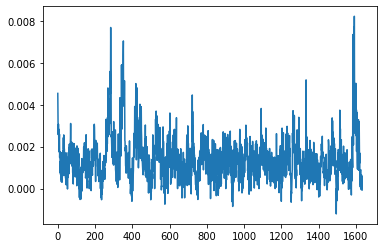

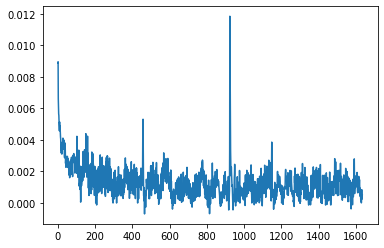

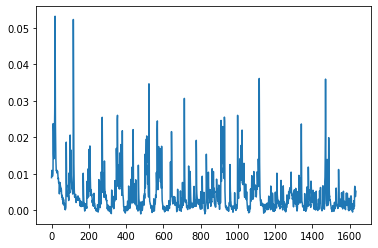

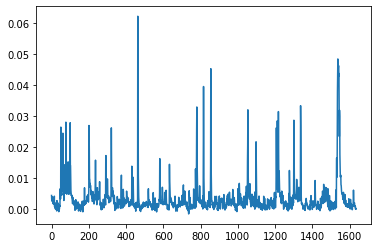

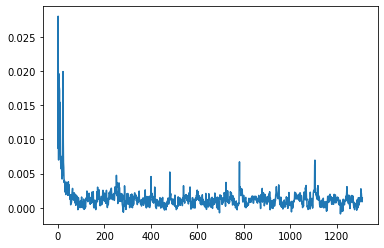

In [137]:
threshs = [0.005,0.004,0.02,0.01,0.005]
struggleRates_caf_veh = np.zeros([len(caf_veh_ca),])
for i in range(len(caf_veh_ca)):
    plt.figure()
    plt.plot(caf_veh_ca[i])
    timeframe = caf_veh_ca[i][200:]
    peaks,times = find_peaks(timeframe,height = threshs[i])
    struggleRates_caf_veh[i] = len(peaks)/len(timeframe)*1.81

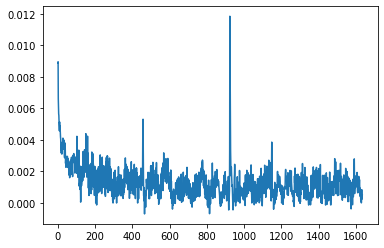

In [174]:
plt.figure()
plt.plot(caf_veh_ca[1])
plt.

In [138]:
struggleRates_caf_veh

array([0.01639721, 0.00252265, 0.02144251, 0.0365784 , 0.00488309])

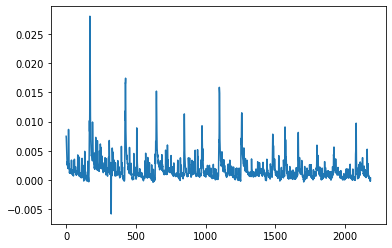

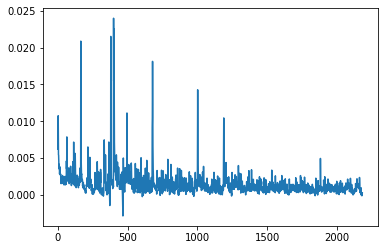

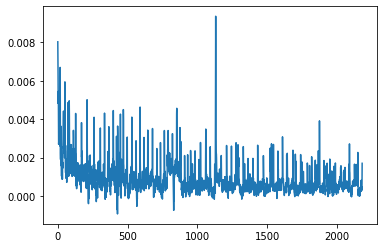

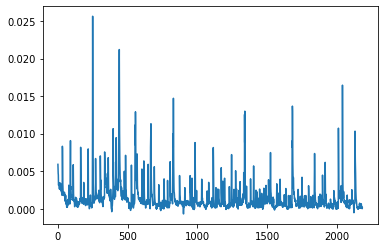

In [139]:
threshs = [0.002,0.005,0.0013,0.0015]
struggleRates_ctrl_cap = np.zeros([len(ctrl_cap_ca),])
for i in range(len(ctrl_cap_ca)):
    plt.figure()
    plt.plot(ctrl_cap_ca[i])
    timeframe = ctrl_cap_ca[i][200:]
    peaks,times = find_peaks(timeframe,height = threshs[i])
    struggleRates_ctrl_cap[i] = len(peaks)/len(timeframe)*1.21

In [140]:
struggleRates_ctrl_cap

array([0.10556228, 0.0091528 , 0.09824004, 0.09213817])

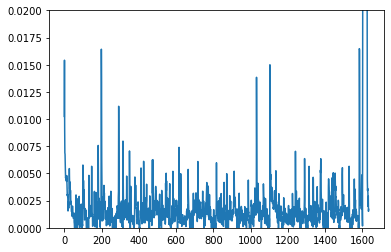

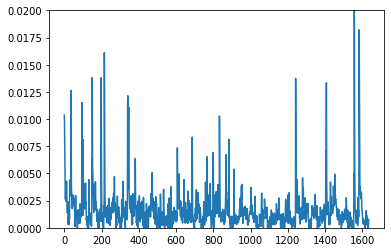

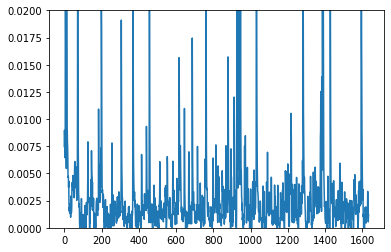

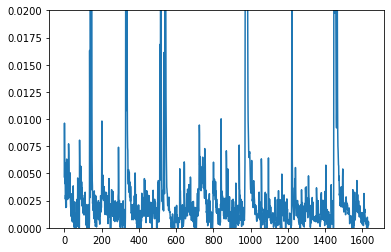

In [172]:
threshs = [0.01,0.005,0.01,0.01]
struggleRates_ctrl_veh = np.zeros([len(ctrl_veh_ca),])
for i in range(len(ctrl_veh_ca)):
    plt.figure()
    plt.plot(ctrl_veh_ca[i])
    timeframe = ctrl_veh_ca[i][200:]
    peaks,times = find_peaks(timeframe,height = threshs[i])
    struggleRates_ctrl_veh[i] = len(peaks)/len(timeframe)*1.81
    plt.ylim(0,0.02)

In [142]:
struggleRates_ctrl_veh

array([0.01135192, 0.02270383, 0.02774913, 0.01891986])

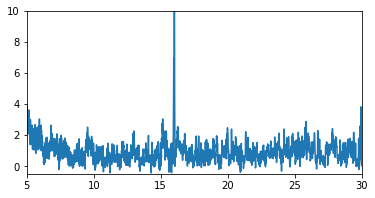

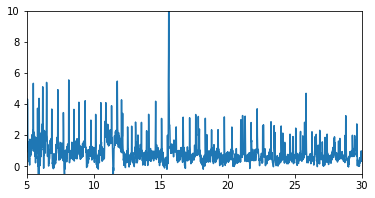

In [196]:
sample_caf = caf_cap_ca[1]
sample_ctrl =ctrl_cap_ca[2]
time = np.linspace(0,len(sample_caf)/1.21/60,len(sample_caf))
plt.figure(figsize=(6,3))
plt.plot(time,sample_caf/np.std(sample_caf))
#plt.ylim(-0.001,0.008)
plt.xlim(5,30)
plt.ylim(-0.5,10)
plt.savefig(r'Z:\Alex\adenosine_paper\elavl3jrgeco_gfaptrpv1_caf_cap.svg',dpi=300)
plt.figure(figsize=(6,3))
plt.plot(time,sample_ctrl/np.std(sample_ctrl))
plt.xlim(5,30)
plt.ylim(-0.5,10)
#plt.ylim(-0.001,0.008)
plt.savefig(r'Z:\Alex\adenosine_paper\elavl3jrgeco_gfaptrpv1_ctrl_cap.svg',dpi=300)

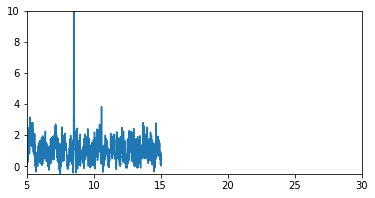

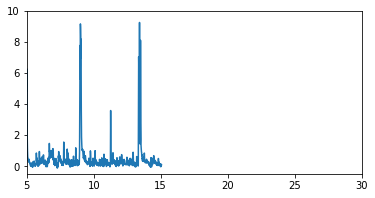

In [197]:
sample_caf = caf_veh_ca[1]
sample_ctrl =ctrl_veh_ca[3]
time = np.linspace(0,len(sample_caf)/1.81/60,len(sample_caf))
plt.figure(figsize=(6,3))
plt.plot(time,sample_caf/np.std(sample_caf))
#plt.ylim(-0.001,0.008)
plt.xlim(5,30)
plt.ylim(-0.5,10)
plt.savefig(r'Z:\Alex\adenosine_paper\elavl3jrgeco_gfaptrpv1_caf_veh.svg',dpi=300)
plt.figure(figsize=(6,3))
plt.plot(time,sample_ctrl/np.std(sample_ctrl))

plt.ylim(-0.5,10)
plt.xlim(5,30)
plt.savefig(r'Z:\Alex\adenosine_paper\elavl3jrgeco_gfaptrpv1_ctrl_veh.svg',dpi=300)

In [143]:
compiled = {}
compiled['condition'] = []
compiled['rate'] = []
for i in range(len(struggleRates_ctrl_veh)):
    compiled['condition'].append('ctrl_veh')
    compiled['rate'].append(struggleRates_ctrl_veh[i])

for i in range(len(struggleRates_ctrl_cap)):
    compiled['condition'].append('ctrl_cap')
    compiled['rate'].append(struggleRates_ctrl_cap[i])
    
for i in range(len(struggleRates_caf_veh)):
    compiled['condition'].append('caf_veh')
    compiled['rate'].append(struggleRates_caf_veh[i])
    
for i in range(len(struggleRates_ctrl_veh)):
    compiled['condition'].append('caf_cap')
    compiled['rate'].append(struggleRates_caf_cap[i])

In [170]:
import seaborn as sb
import pandas as pd

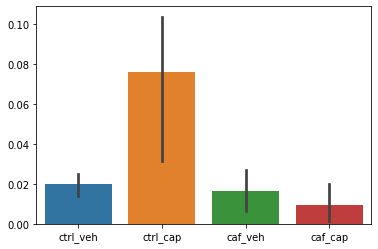

In [145]:
plt.figure()
sb.barplot(data=compiled,x='condition',y='rate')

In [171]:
pd.DataFrame(compiled).to_csv(r'Z:\Alex\adenosine_paper\compiled_lmo_activation.csv')